In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Ross_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.3707 - root_mean_squared_error: 0.6088

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 9s 109ms/step - loss: 0.3707 - root_mean_squared_error: 0.6088 - val_loss: 0.3230 - val_root_mean_squared_error: 0.5683
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.3124 - root_mean_squared_error: 0.5589

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.3100 - root_mean_squared_error: 0.5568 - val_loss: 0.2793 - val_root_mean_squared_error: 0.5285
Epoch 3/50
49/53 [==========================>...] - ETA: 0s - loss: 0.2649 - root_mean_squared_error: 0.5147

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.2664 - root_mean_squared_error: 0.5161 - val_loss: 0.2340 - val_root_mean_squared_error: 0.4838
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.2228 - root_mean_squared_error: 0.4720

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.2228 - root_mean_squared_error: 0.4720 - val_loss: 0.1951 - val_root_mean_squared_error: 0.4417
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1886 - root_mean_squared_error: 0.4343

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1875 - root_mean_squared_error: 0.4330 - val_loss: 0.1618 - val_root_mean_squared_error: 0.4022
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1568 - root_mean_squared_error: 0.3960

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1523 - root_mean_squared_error: 0.3903 - val_loss: 0.1329 - val_root_mean_squared_error: 0.3646
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1208 - root_mean_squared_error: 0.3476

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.1224 - root_mean_squared_error: 0.3499 - val_loss: 0.1025 - val_root_mean_squared_error: 0.3202
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1049 - root_mean_squared_error: 0.3239

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0989 - root_mean_squared_error: 0.3145 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2884
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0756 - root_mean_squared_error: 0.2749

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0736 - root_mean_squared_error: 0.2712 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2533
Epoch 10/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0582 - root_mean_squared_error: 0.2412

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0600 - root_mean_squared_error: 0.2450 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2202
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2143

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0458 - root_mean_squared_error: 0.2140 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1834
Epoch 12/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1843

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0286 - root_mean_squared_error: 0.1693

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1334
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.1442

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0208 - root_mean_squared_error: 0.1442 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1373
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1265

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 17/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1221

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757
Epoch 18/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1036

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0112 - root_mean_squared_error: 0.1056 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 21/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0984

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0090 - root_mean_squared_error: 0.0947 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1318
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0048 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0090 - root_mean_squared_error: 0.0950 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0908 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0139 - root_mean_squared_error: 0.1177 - val_loss: 0.0081 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0094 - root_mean_squared_error: 0.0972 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 47/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1348
Epoch 49/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0094 - root_mean_squared_error: 0.0970 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617
Epoch 50/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.0941

INFO:tensorflow:Assets written to: Ross_model\assets


INFO:tensorflow:Assets written to: Ross_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.850365948677063 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

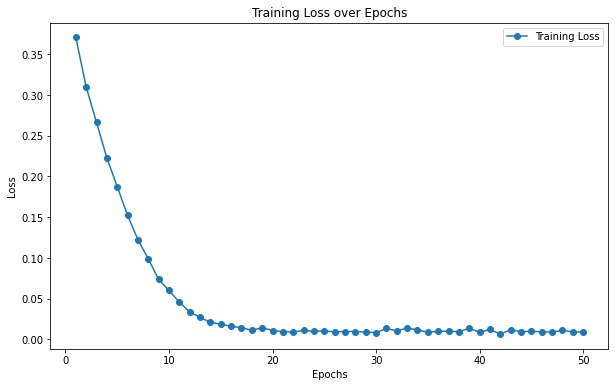

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

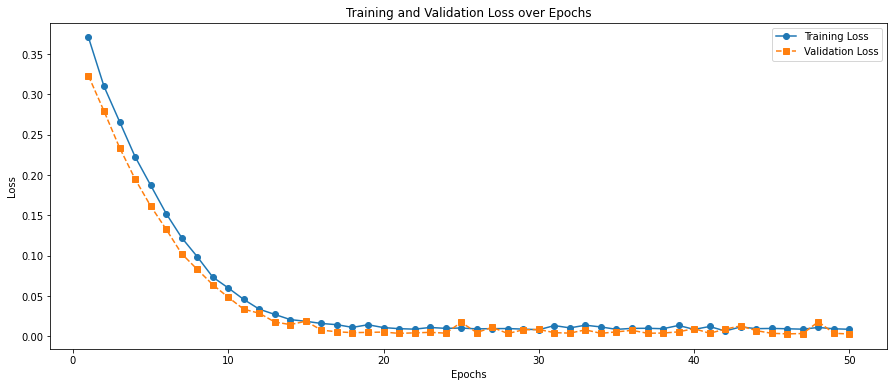

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05656844343839741
MAE : 0.04085217011165008


In [11]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,2.621251e+06,2649273.174
1,3.209882e+06,3168444.759
2,3.673308e+06,3656196.531
3,3.910361e+06,3794128.369
4,4.043353e+06,3885746.442
5,3.744914e+06,3909211.179
6,3.508759e+06,3499167.351
7,2.340448e+06,2715890.297
8,1.277294e+06,1053272.694
9,3.622263e+05,368862.123


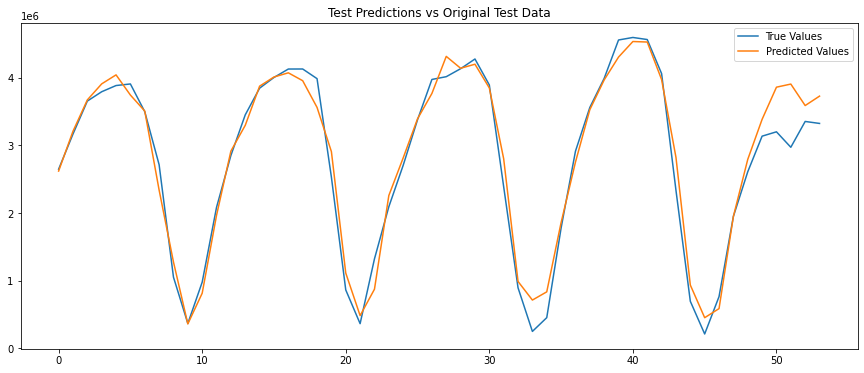

In [13]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [14]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

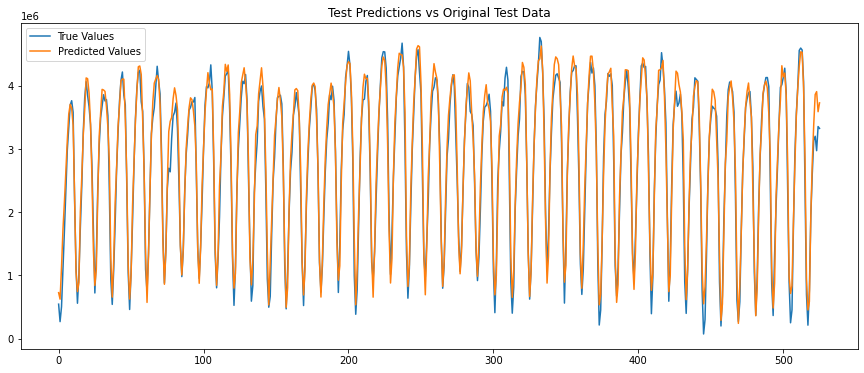

In [18]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()